In [45]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [46]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)
display(MitoPW[:5])

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs
MitoPathway,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0..."


In [47]:
mtDNA = MitoCarta[['Symbol','EnsemblGeneID']]
mtDNA = mtDNA[mtDNA['Symbol'].str.startswith('mt-')].reset_index(drop=True)
mtDNA = mtDNA.rename(columns={'Symbol':'gene_name', 'EnsemblGeneID':'gene_id'})[['gene_id']]
mtDNA['mtDNA'] = 'mtDNA'
# display(mtDNA)

# Plotting

In [48]:
RD = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_log2FC.tsv', sep='\t').drop(columns='gene_name')

display(RD)

,gene_id,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c
0,ENSMUSG00000033845,-0.671003,-0.069029,-0.193291,-0.341792,-0.441117,-0.363656
1,ENSMUSG00000025903,-0.194914,0.463091,0.163485,-0.464949,0.161578,-0.335146
2,ENSMUSG00000033813,-0.008186,0.401248,0.062004,0.168080,0.165488,0.236005
3,ENSMUSG00000033793,0.063644,0.347290,0.398696,0.084042,0.363091,0.404513
4,ENSMUSG00000025907,0.165708,0.342509,-0.241816,-0.234984,-0.623727,-0.119535
...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,0.019150,1.072969,-1.775453,-1.965660,-2.617272,-2.638280
11806,ENSMUSG00000064363,-1.840285,-0.182261,-1.046066,-1.764191,-0.912711,-1.274588
11807,ENSMUSG00000064367,-0.629857,0.198241,-0.824479,-0.826304,-0.370965,-0.510705
11808,ENSMUSG00000064368,-0.901645,-0.145785,-0.779583,-0.715231,0.115233,-0.355842


In [49]:
# Plot data
MTPWs = ['CI subunits',
         'CII subunits',
         'CIII subunits',
         'CIV subunits',
         'CV subunits']

plot_data = pd.DataFrame(columns=['Value','Day','rep','gene_id','MitoPW'])
for MTPW in MTPWs:
    genes = pd.DataFrame({'gene_id' : MitoPW.loc[MTPW,'EnsemblGeneIDs'].split(',')})  
    genes_table = pd.merge(genes, RD[['gene_id']+[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']]], on='gene_id')
    genes_table = pd.melt(genes_table, id_vars=['gene_id'], value_vars=[f'RD{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']])
    genes_table['Day'] = genes_table['variable'].str[2] 
    genes_table['rep'] = genes_table['variable'].str[3]
    genes_table['MitoPW'] = MTPW
    genes_table = genes_table.drop(columns='variable').rename(columns={'value':'Value'})
    plot_data = pd.concat([plot_data, genes_table])

plot_data = pd.merge(plot_data, mtDNA, on='gene_id', how='left').replace(np.nan, 'ncDNA')

display(plot_data)

,Value,Day,rep,gene_id,MitoPW,mtDNA
0,-1.725031,4,a,ENSMUSG00000064341,CI subunits,mtDNA
1,-1.503562,4,a,ENSMUSG00000064345,CI subunits,mtDNA
2,0.019150,4,a,ENSMUSG00000064360,CI subunits,mtDNA
3,-1.840285,4,a,ENSMUSG00000064363,CI subunits,mtDNA
4,-0.629857,4,a,ENSMUSG00000064367,CI subunits,mtDNA
...,...,...,...,...,...,...
571,0.384204,8,c,ENSMUSG00000000563,CV subunits,ncDNA
572,-0.732153,8,c,ENSMUSG00000054428,CV subunits,ncDNA
573,0.548549,8,c,ENSMUSG00000054894,CV subunits,ncDNA
574,-1.828626,8,c,ENSMUSG00000064357,CV subunits,mtDNA


---

In [50]:
RD_avglogFC = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RD_avglogFC = pd.merge(RD_avglogFC, mtDNA, on='gene_id', how='left').replace(np.nan, 'nDNA')

display(RD_avglogFC)

,gene_id,D4,D8,mtDNA
0,ENSMUSG00000033845,-0.311108,-0.382188,nDNA
1,ENSMUSG00000025903,0.143887,-0.212839,nDNA
2,ENSMUSG00000033813,0.151689,0.189858,nDNA
3,ENSMUSG00000033793,0.269876,0.283882,nDNA
4,ENSMUSG00000025907,0.088801,-0.326082,nDNA
...,...,...,...,...
11805,ENSMUSG00000064360,-0.227778,-2.407071,mtDNA
11806,ENSMUSG00000064363,-1.022871,-1.317163,mtDNA
11807,ENSMUSG00000064367,-0.418699,-0.569325,mtDNA
11808,ENSMUSG00000064368,-0.609004,-0.318614,mtDNA


In [51]:
# Plot data
MTPWs = ['CI subunits',
         'CII subunits',
         'CIII subunits',
         'CIV subunits',
         'CV subunits']

heat_data = {}
for MTPW in MTPWs:
    genes = pd.DataFrame({'gene_id' : MitoPW.loc[MTPW,'EnsemblGeneIDs'].split(',')})  
    heat_data[MTPW] = pd.merge(genes, RD_avglogFC, on='gene_id').sort_values(by=['mtDNA','D8'], ascending=True)
    heat_data[MTPW]['Origin_index'] = heat_data[MTPW][['mtDNA']].replace({'mtDNA':1, 'nDNA':-1})['mtDNA']
    heat_data[MTPW] = heat_data[MTPW][::-1]
    print(len(heat_data[MTPW]))

display(heat_data[MTPW])

42
4
10
20
20


,gene_id,D4,D8,mtDNA,Origin_index
17,ENSMUSG00000054894,0.230823,0.450130,nDNA,-1
0,ENSMUSG00000025428,0.160434,0.349859,nDNA,-1
15,ENSMUSG00000000563,0.101761,0.213817,nDNA,-1
7,ENSMUSG00000034566,-0.233629,0.015807,nDNA,-1
2,ENSMUSG00000025781,0.015490,0.004073,nDNA,-1
3,ENSMUSG00000003072,0.002550,-0.060149,nDNA,-1
1,ENSMUSG00000025393,-0.241517,-0.109319,nDNA,-1
14,ENSMUSG00000022956,-0.128477,-0.176022,nDNA,-1
6,ENSMUSG00000018770,-0.352033,-0.488400,nDNA,-1
11,ENSMUSG00000038717,-0.218704,-0.506555,nDNA,-1


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_95316/3760334338.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=using_data, x="Value", y="MitoPW",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_95316/3760334338.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=using_data, x="Value", y="MitoPW",


<Figure size 640x480 with 0 Axes>

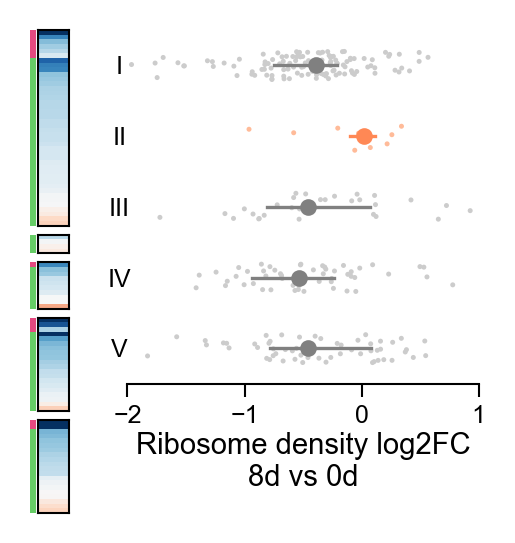

In [ ]:
day = '8'

sF = 1.15 # Size factor
wgap = 0.3
hgap = 0.1
nrow, ncol = 2, 2

height_ratios = [1, 0.3]
width_ratios = [0.1, 0.9]

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


# Strip + point ----------------------------------------------------------------------------------------

ax = fig.add_subplot(grid[0,1])

using_data = plot_data[plot_data['Day']==day]
sns.stripplot(data=using_data, x="Value", y="MitoPW",
                # c='#CCCCCC',
                palette=['#CCCCCC','#FFBB99','#CCCCCC','#CCCCCC','#CCCCCC'],
                size = 1.2, 
                jitter= 0.2,
                ax=ax, linewidth = 0,
                legend=False)
sns.pointplot(data=using_data, x="Value", y="MitoPW", 
                estimator='median', marker=".", markersize=8, markeredgewidth=0, 
                # color='#808080',
                palette=['#808080','#FF8855','#808080','#808080','#808080'],
                errorbar=('pi',50), lw=0.8,
                # errorbar='ci', lw=0.8,
                linestyle="none", zorder=5)

ax.set_xlim(-2, 1)
ax.set_xticks((-2,-1,0,1))
ax.set_yticks([*range(5)])
ax.set_yticklabels(['I','II','III','IV','V'], ha='center')
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='y', length=0, pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)    

ax.set_xlabel(f'Ribosome density log2FC\n{day}d vs 0d', labelpad=1)
ax.set_ylabel('')


# heat map ----------------------------------------------------------------------------------------
subgrid = gridspec.GridSpecFromSubplotSpec(5, 2,
                                            width_ratios=[0.2, 1], height_ratios=[42, 4, 10, 20, 20],
                                            wspace=0.1, hspace=0.1,
                                            subplot_spec=grid[:,0])

row = 0
for MTPW in heat_data:
    heat_ax = fig.add_subplot(subgrid[row,1])
    DNA_ax = fig.add_subplot(subgrid[row,0])

    heat_ax.pcolormesh(heat_data[MTPW][[f'D{day}']] ,cmap='RdBu_r', vmin=-2, vmax=2)

    heat_ax.set_xticks([])
    heat_ax.set_yticks([])


    DNA_ax.pcolormesh(heat_data[MTPW][['Origin_index']] ,cmap=ListedColormap(['#66CC66','#E54980']))

    DNA_ax.set_xticks([])
    DNA_ax.set_yticks([])

    DNA_ax.spines['top'].set_visible(False)
    DNA_ax.spines['right'].set_visible(False)
    DNA_ax.spines['bottom'].set_visible(False)
    DNA_ax.spines['left'].set_visible(False)

    row += 1


plt.savefig(f'OXPHOS_RDlogFC_strip-point_{day}d.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [53]:
from scipy.stats import mannwhitneyu

for i in ['I','II','III','IV','V']:
    print(f"C{i} subunits : {len(using_data[using_data['MitoPW']==f'C{i} subunits'])//3} x 3")

print(mannwhitneyu(using_data[using_data['MitoPW']=='CI subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CIII subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CIV subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CV subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))

CI subunits : 42 x 3
CII subunits : 4 x 3
CIII subunits : 10 x 3
CIV subunits : 20 x 3
CV subunits : 20 x 3
MannwhitneyuResult(statistic=343.0, pvalue=0.0018272613530234026)
MannwhitneyuResult(statistic=119.0, pvalue=0.09209294065411702)
MannwhitneyuResult(statistic=145.0, pvalue=0.0011907623253591215)
MannwhitneyuResult(statistic=239.0, pvalue=0.06864507637622011)


---

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_95316/426572336.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=using_data, x="Value", y="MitoPW",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_95316/426572336.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=using_data, x="Value", y="MitoPW",


<Figure size 640x480 with 0 Axes>

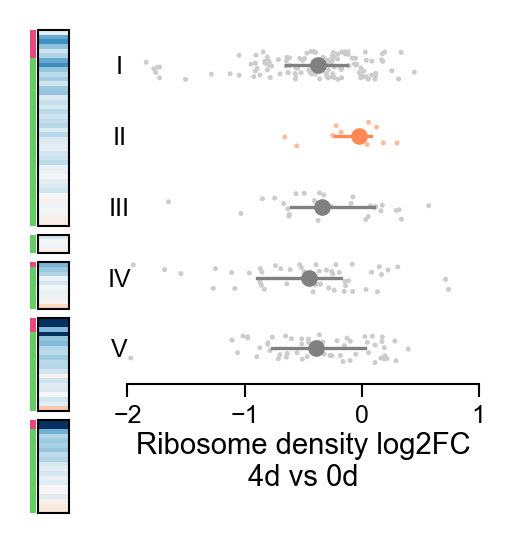

In [ ]:
day = '4'

sF = 1.15 # Size factor
wgap = 0.3
hgap = 0.1
nrow, ncol = 2, 2

height_ratios = [1, 0.3]
width_ratios = [0.1, 0.9]

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


# Strip + point ----------------------------------------------------------------------------------------

ax = fig.add_subplot(grid[0,1])

using_data = plot_data[plot_data['Day']==day]
sns.stripplot(data=using_data, x="Value", y="MitoPW",
                # c='#CCCCCC',
                palette=['#CCCCCC','#FFBB99','#CCCCCC','#CCCCCC','#CCCCCC'],
                size = 1.2, 
                jitter= 0.2,
                ax=ax, linewidth = 0,
                legend=False)
sns.pointplot(data=using_data, x="Value", y="MitoPW", 
                estimator='median', marker=".", markersize=8, markeredgewidth=0, 
                # color='#808080',
                palette=['#808080','#FF8855','#808080','#808080','#808080'],
                errorbar=('pi',50), lw=0.8,
                # errorbar='ci', lw=0.8,
                linestyle="none", zorder=5)

ax.set_xlim(-2, 1)
ax.set_xticks((-2,-1,0,1))
ax.set_yticks([*range(5)])
ax.set_yticklabels(['I','II','III','IV','V'], ha='center')
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='y', length=0, pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)    

ax.set_xlabel(f'Ribosome density log2FC\n{day}d vs 0d', labelpad=1)
ax.set_ylabel('')


# heat map ----------------------------------------------------------------------------------------
subgrid = gridspec.GridSpecFromSubplotSpec(5, 2,
                                            width_ratios=[0.2, 1], height_ratios=[42, 4, 10, 20, 20],
                                            wspace=0.1, hspace=0.1,
                                            subplot_spec=grid[:,0])

row = 0
for MTPW in heat_data:
    heat_ax = fig.add_subplot(subgrid[row,1])
    DNA_ax = fig.add_subplot(subgrid[row,0])

    heat_ax.pcolormesh(heat_data[MTPW][[f'D{day}']] ,cmap='RdBu_r', vmin=-2, vmax=2)

    heat_ax.set_xticks([])
    heat_ax.set_yticks([])


    DNA_ax.pcolormesh(heat_data[MTPW][['Origin_index']] ,cmap=ListedColormap(['#66CC66','#E54980']))

    DNA_ax.set_xticks([])
    DNA_ax.set_yticks([])

    DNA_ax.spines['top'].set_visible(False)
    DNA_ax.spines['right'].set_visible(False)
    DNA_ax.spines['bottom'].set_visible(False)
    DNA_ax.spines['left'].set_visible(False)

    row += 1


plt.savefig(f'OXPHOS_RDlogFC_strip-point_{day}d.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [55]:
from scipy.stats import mannwhitneyu

for i in ['I','II','III','IV','V']:
    print(f"C{i} subunits : {len(using_data[using_data['MitoPW']==f'C{i} subunits'])//3} x 3")

print(mannwhitneyu(using_data[using_data['MitoPW']=='CI subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CIII subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CIV subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CV subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))

CI subunits : 42 x 3
CII subunits : 4 x 3
CIII subunits : 10 x 3
CIV subunits : 20 x 3
CV subunits : 20 x 3
MannwhitneyuResult(statistic=399.0, pvalue=0.007064055107914589)
MannwhitneyuResult(statistic=139.0, pvalue=0.2594832909956578)
MannwhitneyuResult(statistic=170.0, pvalue=0.004192071114582089)
MannwhitneyuResult(statistic=228.0, pvalue=0.046927046070090635)
